<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./datasets/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [12]:
# Answer:
# top 10 shortest duration movies
movies.sort_values('duration',ascending = True).title.head(10)

389                            Freaks
338               Battleship Potemkin
258       The Cabinet of Dr. Caligari
293                         Duck Soup
88                            The Kid
742                         Following
351                      Frankenstein
938               Alice in Wonderland
405         The Bride of Frankenstein
303    The Nightmare Before Christmas
Name: title, dtype: object

In [15]:
# top 10 longest duration movies
movies.sort_values('duration',ascending = False).title.head(10)

476                               Hamlet
157                   Gone with the Wind
78           Once Upon a Time in America
142    Lagaan: Once Upon a Time in India
445                 The Ten Commandments
85                    Lawrence of Arabia
204                              Ben-Hur
17                         Seven Samurai
767      It's a Mad, Mad, Mad, Mad World
630                            Malcolm X
Name: title, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

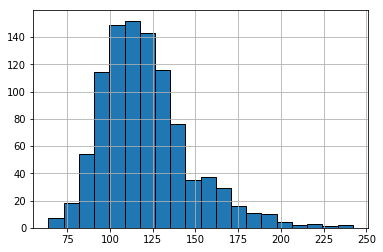

In [25]:
# Answer:
# tried to plot using different bins, kinda find 20 is a good number of bins. 
# It shows that the duration distribution is right-skewed.
movies.duration.hist(bins=20, edgecolor='black');

#### Use a box plot to display that same data.

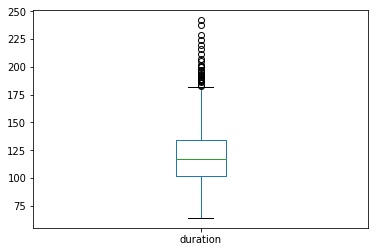

In [27]:
# Answer:
movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [34]:
# Answer:
movies.groupby('content_rating').title.count().sort_values(ascending=False)

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Movie Counts')

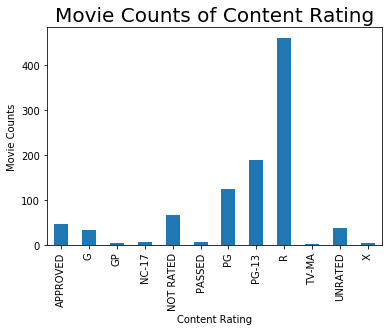

In [48]:
# Answer:
ax = movies.groupby('content_rating').title.count().plot(kind='bar')

ax.set_title('Movie Counts of Content Rating', size=20)
ax.set_xlabel('Content Rating')
ax.set_ylabel('Movie Counts')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [56]:
# Answer:
# boolean series to indiate if the rating is under the above categories.
import numpy as np

need_change = movies.content_rating.isin(['NOT RATED','APPROVED','PASSED','GP'])

movies['content_rating'] = np.where(need_change, 'UNRATED', movies['content_rating'])

In [57]:
# check if the change is successful or not
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [65]:
# Answer:

need_change2 = movies.content_rating.isin(['X','TV-MA'])
movies['content_rating'] = np.where(need_change2, 'NC-17', movies['content_rating'])

In [66]:
# check if the change is successful or not
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [60]:
# Answer:
# only content_rating has nulls
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [75]:
# Answer:
# Since it already has an 'UNRATED' category, it makes sense to fill na with "UNRATED"
movies.content_rating.fillna('UNRATED', inplace=True)

In [76]:
# verify
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [83]:
# Answer:
rating_long = movies[movies.duration>120].star_rating.mean()

rating_short = movies[movies.duration<120].star_rating.mean()

print("The average star ratinf for movies 2 hours or longer is {}".format(rating_long))
print("The average star ratinf for movies shorter than 2 hours is {}".format(rating_short))

The average star ratinf for movies 2 hours or longer is 7.953669724770642
The average star ratinf for movies shorter than 2 hours is 7.838666666666665


In [84]:
rating_long > rating_short

True

#### Use a visualization to detect whether there is a relationship between duration and star rating.

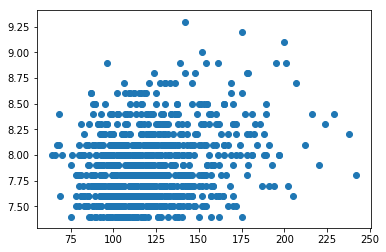

In [92]:
# Answer:
# by looking at the plot itself, it doesn't give too much info. 
x = movies.duration
y = movies.star_rating
plt.scatter(x,y)

In [93]:
# check the correlation: there is a week correlation between star rating and duration.
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [94]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

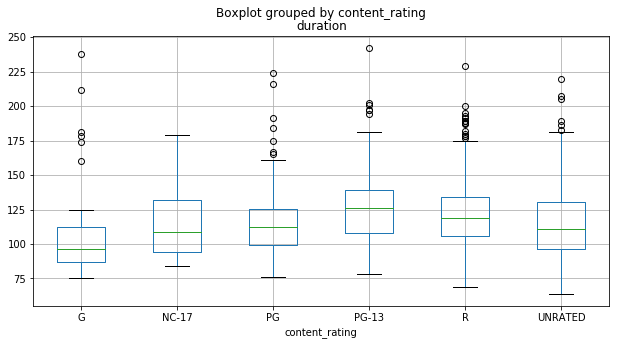

In [98]:
# Answer:
movies.boxplot(column='duration', by='content_rating', figsize=(10,5))

#### Determine the top rated movie (by star rating) for each genre.

In [105]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi..."
38,8.6,Rear Window,UNRATED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
35,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [115]:
# Answer:
# By looking at the actors list of the movies with duplicated names, probably they are not truely duplicates.
movies[movies.title.duplicated(False)]


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [116]:
# Answer:
# First, check the number of movies for each genre.
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [117]:
# Manually create a list of genres with at least 10 movies.
relevant_genre = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

In [120]:
movies[movies.genre.isin(relevant_genre)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [129]:
# Answer:
genre_cnt = movies.genre.value_counts()
# automatically create a list of relevant genres
relevant = list(genre_cnt[genre_cnt>10].index)
relevant

['Drama',
 'Comedy',
 'Action',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror',
 'Mystery']

In [133]:
movies[movies.genre.isin(relevant)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [137]:
# Answer:
# first calculate the avg star rating for all
avg_rating = movies.groupby('genre').star_rating.mean()
avg_rating

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [138]:
# use boolean to filter out
avg_rating[movies.genre.value_counts()>10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [142]:
# Answer:
# aggregate by count and mean for each genre
rating = movies.groupby('genre').star_rating.agg(['mean','count'])
rating

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Family,7.850000,2
Fantasy,7.700000,1


In [144]:
rating[rating['count']>10]

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [147]:
movies.actors_list.value_counts()

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                         6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                           3
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']                     2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                                   2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']                      2
                                                                              ..
[u'Maribel Verd\xfa', u'Gael Garc\xeda Bernal', u'Daniel Gim\xe9nez Cacho']    1
[u'Quinton Aaron', u'Sandra Bullock', u'Tim McGraw']                           1
[u'Arnold Schwarzenegger', u'Linda Hamilton', u'Edward Furlong']               1
[u'Mia Farrow', u'Dianne Wiest', u'Michael Caine']                             1
[u'Robert Downey Jr.', u'Geraldine Chaplin', u'Paul Rhys']                     1
Name: actors_list, Length: 969, dtype: int64

In [161]:
# convert the actors list to 3 columns to hold all the actors
def get_actor_1(col):
    name_list = col.split(',')
    return name_list[0][3:-2]
movies['actor1'] = movies.actors_list.apply(get_actor_1)

def get_actor_2(col):
    name_list = col.split(',')
    return name_list[1][3:-2]
movies['actor2'] = movies.actors_list.apply(get_actor_2)

def get_actor_3(col):
    name_list = col.split(',')
    return name_list[2][3:-2]
movies['actor3'] = movies.actors_list.apply(get_actor_3)

In [162]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,actor1,actor2,actor3
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Tim Robbin,Morgan Freema,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Marlon Brand,Al Pacin,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Al Pacin,Robert De Nir,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Christian Bal,Heath Ledge,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",John Travolt,Uma Thurma,Samuel L. Jackson


In [166]:
df1 = movies[['star_rating','actor1']]
df2 = movies[['star_rating','actor2']]
df3 = movies[['star_rating','actor3']]

In [197]:
# remame the columns to be the same
df1.rename(columns={'actor1':'actor'}, inplace=True)
df2.rename(columns={'actor2':'actor'}, inplace=True)
df3.rename(columns={'actor3':'actor'}, inplace=True)

In [199]:
df = df1.append(df2, ignore_index = True)

In [200]:
df = df.append(df3, ignore_index = True)

In [202]:
# a final df with actors and the ratings. 
df

,star_rating,actor
0,9.3,Tim Robbin
1,9.2,Marlon Brand
2,9.1,Al Pacin
3,9.0,Christian Bal
4,8.9,John Travolt
...,...,...
2932,7.4,Teri Garr
2933,7.4,Mary Steenburgen
2934,7.4,Billy Boyd
2935,7.4,Craig T. Nelson


In [211]:
# take a look at the mean rating for top 10 actors
df.groupby('actor').star_rating.mean().sort_values(ascending=False).head(10)

actor
Bob Gunton       9.3
James Caan       9.2
Aaron Eckhart    9.0
Ben Kingsley     8.9
John Travolt     8.9
Eli Wallac       8.9
Martin Balsam    8.9
Lee J. Cob       8.9
Lee Van Cleef    8.9
Gary Sinise      8.8
Name: star_rating, dtype: float64